In [1]:
%%capture
!pip install mne

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import mne
import pywt

#Load the epochs
folder = '/content/drive/MyDrive/EEG Signal /Epileptic seizure/data/equalized epoch'
epochs_path = [os.path.join(folder,i) for i in os.listdir(folder) if i[-3:]=='fif']

data= [mne.read_epochs(i).pick_types(eeg=True) for i in epochs_path]
# Define a standard channel order
# This example uses alphabetical order, but you can order them based on your specific needs
standard_order = sorted(data[0].ch_names)

for epochs in data:
    epochs.reorder_channels(standard_order)
    # print(epochs.ch_names)  # Optional: Print the channel names to verify the new order

labels = [mne.read_epochs(i).events[:,2] for i in epochs_path]
group = [[i]*len(j) for i,j in enumerate(data)]

#Stack the list data
X=np.vstack(data)
Y=np.hstack(labels)
group= np.hstack(group)

In [ ]:
# # Define a standard channel order
# # This example uses alphabetical order, but you can order them based on your specific needs
# standard_order = sorted(data[0].ch_names)

# for epochs in data:
#     epochs.reorder_channels(standard_order)
#     print(epochs.ch_names)  # Optional: Print the channel names to verify the new order

In [ ]:
for i in data:
  print(i.ch_names)

['C3', 'C4', 'CP1', 'CP2', 'CP5', 'CP6', 'Cz', 'F10', 'F3', 'F4', 'F7', 'F8', 'F9', 'FC1', 'FC2', 'FC5', 'FC6', 'Fp1', 'Fp2', 'Fz', 'O1', 'O2', 'P3', 'P4', 'Pz', 'T3', 'T4', 'T5', 'T6']
['C3', 'C4', 'CP1', 'CP2', 'CP5', 'CP6', 'Cz', 'F10', 'F3', 'F4', 'F7', 'F8', 'F9', 'FC1', 'FC2', 'FC5', 'FC6', 'Fp1', 'Fp2', 'Fz', 'O1', 'O2', 'P3', 'P4', 'Pz', 'T3', 'T4', 'T5', 'T6']
['C3', 'C4', 'CP1', 'CP2', 'CP5', 'CP6', 'Cz', 'F10', 'F3', 'F4', 'F7', 'F8', 'F9', 'FC1', 'FC2', 'FC5', 'FC6', 'Fp1', 'Fp2', 'Fz', 'O1', 'O2', 'P3', 'P4', 'Pz', 'T3', 'T4', 'T5', 'T6']
['C3', 'C4', 'CP1', 'CP2', 'CP5', 'CP6', 'Cz', 'F10', 'F3', 'F4', 'F7', 'F8', 'F9', 'FC1', 'FC2', 'FC5', 'FC6', 'Fp1', 'Fp2', 'Fz', 'O1', 'O2', 'P3', 'P4', 'Pz', 'T3', 'T4', 'T5', 'T6']
['C3', 'C4', 'CP1', 'CP2', 'CP5', 'CP6', 'Cz', 'F10', 'F3', 'F4', 'F7', 'F8', 'F9', 'FC1', 'FC2', 'FC5', 'FC6', 'Fp1', 'Fp2', 'Fz', 'O1', 'O2', 'P3', 'P4', 'Pz', 'T3', 'T4', 'T5', 'T6']
['C3', 'C4', 'CP1', 'CP2', 'CP5', 'CP6', 'Cz', 'F10', 'F3', 'F4', 'F7'

In [ ]:
print(X.shape,Y.shape,group.shape)

(5834, 29, 180) (5834,) (5834,)


# Feature Extraction methods

##Time-domain Features

1. Mean (mean_val): The average value of the signal amplitude, representing the signal's central tendency.

2. Median (median_val): The middle value of the signal amplitude when sorted, representing the central tendency of the signal, less sensitive to outliers than the mean.

3. Variance (var_val): Measures the spread of the signal's amplitude.

4. Standard Deviation (std_dev): The square root of the variance, representing the dispersion of the signal's amplitude.

5. Skewness (skewness): Measures the asymmetry of the signal's amplitude distribution around the mean.

6. Kurtosis (kurt): Measures the 'tailedness' of the signal's amplitude distribution, indicating the presence of outliers.

7. Zero Crossing Rate (zcr): The rate at which the signal changes sign, indicating frequency content.

8. Root Mean Square (rms_val): Represents the square root of the average of the squares of the signal, indicative of the signal's magnitude.

9. Signal Energy (energy): The sum of the squares of the signal values, indicative of the signal's power.

10. Crest Factor (crest_fact): The ratio of the peak amplitude of the waveform to the RMS value, indicating the extremeness of peaks.

11. Shape Factor (shape_fact): The ratio of the RMS value to the mean absolute value, indicative of the waveform shape.

12. Entropy (signal_entropy): Measures the unpredictability or complexity of the signal.

13. Peak Amplitude (peak_amp): The difference between the maximum and minimum amplitude, indicating the signal's range.

14. Number of Peaks (num_peaks): The count of local maxima, indicating the frequency of oscillations.

15. Average Peak-to-Peak Distance (peak_to_peak_distance): The average distance between consecutive peaks, related to the periodicity of the signal.

16. Hjorth Parameters:

  Activity: Indicates the signal power.

  Mobility: Indicates the mean frequency or the proportion of the standard deviation of the power spectrum.
  
  Complexity: Indicates the bandwidth of the signal or the change in frequency.





In [ ]:
# import numpy as np
# from scipy.stats import skew, kurtosis, entropy
# from scipy.signal import find_peaks


# def hjorth_parameters(signal):
#     diff_input = np.diff(signal)
#     diff_diff_input = np.diff(diff_input)

#     activity = np.var(signal)
#     mobility = np.sqrt(np.var(diff_input)/activity)
#     complexity = np.sqrt(np.var(diff_diff_input)/np.var(diff_input)) / mobility

#     return activity, mobility, complexity

# # def zero_crossing_rate(signal):
# #     # Enhanced ZCR to handle noise
# #     # Setting a threshold (eps) to consider as zero (to avoid detecting false crossings due to noise)
# #     eps = 0.01 * np.std(signal)
# #     zero_crossings = np.where(np.diff(np.sign(signal)))[0]
# #     close_to_zero = np.where(np.abs(signal) < eps)[0]
# #     return (len(zero_crossings) + len(close_to_zero)) / len(signal)

# def zero_crossing_rate(signal):
#     zero_crossings = np.where(np.diff(np.sign(signal)))[0]
#     return len(zero_crossings) / len(signal)

# def safe_divide(numerator, denominator, default=0.0):
#     """Safely divide two numbers, returning a default value if the denominator is zero."""
#     if denominator == 0:
#         return default
#     else:
#         return numerator / denominator

# def signal_entropy(signal):
#     # Calculate histogram of the signal
#     hist, bin_edges = np.histogram(signal, bins='auto', density=True)
#     # Ensure non-zero histogram values by adding a small constant
#     hist += np.finfo(float).eps
#     # Normalize the histogram to get a probability distribution
#     prob_dist = hist / hist.sum()
#     # Calculate the entropy
#     return entropy(prob_dist)

# def rms(signal):
#     return np.sqrt(np.mean(signal**2))

# def signal_energy(signal):
#     return np.sum(signal**2)



# def crest_factor(signal, rms_val=None):
#     if rms_val is None:
#         rms_val = rms(signal)
#     return np.max(np.abs(signal)) / rms_val

# def shape_factor(signal, rms_val=None):
#     if rms_val is None:
#         rms_val = rms(signal)
#     mean_abs = np.mean(np.abs(signal))
#     return rms_val / mean_abs if mean_abs != 0 else 0

# def extract_time_domain_features(epochs):
#     features = []

#     for epoch in epochs:
#         epoch_features = []

#         for channel_data in epoch:
#             # Flatten the channel data if needed
#             flattened_data = np.ravel(channel_data)

#             # Basic Time-Domain Features
#             mean_val = np.mean(flattened_data)
#             median_val = np.median(flattened_data)
#             var_val = np.var(flattened_data)
#             std_dev = np.std(flattened_data)
#             skewness = skew(flattened_data)
#             kurt = kurtosis(flattened_data)
#             zcr = zero_crossing_rate(flattened_data)
#             rms_val = rms(flattened_data)
#             energy = signal_energy(flattened_data)
#             crest_fact = crest_factor(flattened_data, rms_val)
#             shape_fact = shape_factor(flattened_data, rms_val)
#             signal_entropy_val = signal_entropy(flattened_data)  # Use the defined function
#             peak_amp = np.ptp(flattened_data)

#             # Hjorth Parameters
#             activity, mobility, complexity = hjorth_parameters(flattened_data)

#             # Additional Features
#             num_peaks = len(find_peaks(flattened_data)[0])
#             peak_to_peak_distance = np.mean(np.diff(find_peaks(flattened_data)[0])) if num_peaks > 1 else 0

#             channel_features = [
#                 mean_val, median_val, var_val, std_dev, skewness, kurt, zcr, rms_val, energy,
#                  crest_fact, shape_fact, signal_entropy_val,
#                 peak_amp, num_peaks, peak_to_peak_distance,
#                 activity, mobility, complexity
#             ]
#             epoch_features.append(channel_features)

#         features.append(epoch_features)

#     return np.array(features)

In [ ]:
# import numpy as np
# from scipy.stats import skew, kurtosis
# from scipy.signal import find_peaks

# def zero_crossing_rate(signal):
#     zero_crossings = np.where(np.diff(np.sign(signal)))[0]
#     return len(zero_crossings) / len(signal)

# def hjorth_parameters(signal):
#     diff_input = np.diff(signal)
#     diff_diff_input = np.diff(diff_input)

#     activity = np.var(signal)
#     mobility = np.sqrt(np.var(diff_input)/activity)
#     complexity = np.sqrt(np.var(diff_diff_input)/np.var(diff_input)) / mobility

#     return activity, mobility, complexity




# def extract_time_domain_features(epochs):
#     features = []

#     for epoch in epochs:
#         epoch_features = []

#         for channel_data in epoch:
#             # Flatten the channel data
#             flattened_data = channel_data.flatten()

#             # Basic Time-Domain Features
#             mean_val = np.mean(flattened_data)
#             median_val = np.median(flattened_data)
#             var_val = np.var(flattened_data)
#             std_dev = np.std(flattened_data)
#             skewness = skew(flattened_data)
#             kurt = kurtosis(flattened_data)
#             zcr = zero_crossing_rate(flattened_data)
#             peak_amp = np.ptp(flattened_data)

#             # Hjorth Parameters
#             activity, mobility, complexity = hjorth_parameters(flattened_data)

#             # Additional Features
#             num_waves = len(find_peaks(flattened_data)[0])
#             wave_duration = len(flattened_data) / num_waves if num_waves > 0 else 0

#             channel_features = [
#                 mean_val, median_val, var_val, std_dev, skewness, kurt, zcr, num_waves,
#                 wave_duration, peak_amp, activity, mobility, complexity
#             ]
#             epoch_features.append(channel_features)

#         features.append(epoch_features)

#     return np.array(features)

In [ ]:
import numpy as np
from scipy.stats import skew, kurtosis, entropy
from scipy.signal import find_peaks


def hjorth_parameters(signal):
    diff_input = np.diff(signal)
    diff_diff_input = np.diff(diff_input)

    activity = np.var(signal)
    mobility = np.sqrt(np.var(diff_input)/activity)
    complexity = np.sqrt(np.var(diff_diff_input)/np.var(diff_input)) / mobility

    return activity, mobility, complexity

# def zero_crossing_rate(signal):
#     # Enhanced ZCR to handle noise
#     # Setting a threshold (eps) to consider as zero (to avoid detecting false crossings due to noise)
#     eps = 0.01 * np.std(signal)
#     zero_crossings = np.where(np.diff(np.sign(signal)))[0]
#     close_to_zero = np.where(np.abs(signal) < eps)[0]
#     return (len(zero_crossings) + len(close_to_zero)) / len(signal)

def zero_crossing_rate(signal):
    zero_crossings = np.where(np.diff(np.sign(signal)))[0]
    return len(zero_crossings) / len(signal)

def safe_divide(numerator, denominator, default=0.0):
    """Safely divide two numbers, returning a default value if the denominator is zero."""
    if denominator == 0:
        return default
    else:
        return numerator / denominator

def signal_entropy(signal):
    # Calculate histogram of the signal
    hist, bin_edges = np.histogram(signal, bins='auto', density=True)
    # Ensure non-zero histogram values by adding a small constant
    hist += np.finfo(float).eps
    # Normalize the histogram to get a probability distribution
    prob_dist = hist / hist.sum()
    # Calculate the entropy
    return entropy(prob_dist)

def rms(signal):
    return np.sqrt(np.mean(signal**2))

def signal_energy(signal):
    return np.sum(signal**2)



def crest_factor(signal, rms_val=None):
    if rms_val is None:
        rms_val = rms(signal)
    return np.max(np.abs(signal)) / rms_val

def shape_factor(signal, rms_val=None):
    if rms_val is None:
        rms_val = rms(signal)
    mean_abs = np.mean(np.abs(signal))
    return rms_val / mean_abs if mean_abs != 0 else 0

def extract_time_domain_features(epochs):
    features = []

    for epoch in epochs:
        epoch_features = []

        for channel_data in epoch:
            # Flatten the channel data if needed
            flattened_data = np.ravel(channel_data)


            # Basic Time-Domain Features
            mean_val = np.mean(flattened_data)
            median_val = np.median(flattened_data)
            var_val = np.var(flattened_data)
            std_dev = np.std(flattened_data)
            skewness = skew(flattened_data)
            kurt = kurtosis(flattened_data)
            zcr = zero_crossing_rate(flattened_data)
            rms_val = rms(flattened_data)
            energy = signal_energy(flattened_data)
            crest_fact = crest_factor(flattened_data, rms_val)
            shape_fact = shape_factor(flattened_data, rms_val)
            signal_entropy_val = signal_entropy(flattened_data)  # Use the defined function
            peak_amp = np.ptp(flattened_data)

            # Hjorth Parameters
            activity, mobility, complexity = hjorth_parameters(flattened_data)

            # Additional Features
            num_peaks = len(find_peaks(flattened_data)[0])
            peak_to_peak_distance = np.mean(np.diff(find_peaks(flattened_data)[0])) if num_peaks > 1 else 0

            channel_features = [
                mean_val, median_val, var_val, std_dev, skewness, kurt, zcr, rms_val, energy,
                 crest_fact, shape_fact, signal_entropy_val,
                peak_amp, num_peaks, peak_to_peak_distance,
                activity, mobility, complexity
            ]
            epoch_features.append(channel_features)

        features.append(epoch_features)

    return np.array(features)



# def extract_time_domain_features_and_names(epochs, channel_names):
#     all_features = []
#     feature_names = []

#     # Generate feature names
#     feature_types = ['mean', 'median', 'var', 'std_dev', 'skewness', 'kurt', 'zcr', 'rms_val',
#                      'energy', 'crest_fact', 'shape_fact', 'signal_entropy_val', 'peak_amp',
#                      'activity', 'mobility', 'complexity']

#     for channel_name in channel_names:
#         for feature in feature_types:
#             feature_names.append(f"{channel_name}_{feature}")

#     for epoch in epochs:
#         epoch_features = extract_time_domain_features(epoch)
#         all_features.append(epoch_features)

#     return np.array(all_features), feature_names


# channel_names= ['C3', 'C4', 'CP1', 'CP2', 'CP5', 'CP6', 'Cz', 'F10', 'F3', 'F4', 'F7', 'F8', 'F9', 'FC1', 'FC2', 'FC5', 'FC6', 'Fp1', 'Fp2', 'Fz', 'O1', 'O2', 'P3', 'P4', 'Pz', 'T3', 'T4', 'T5', 'T6']

# # Extract features and names
# features, feature_names = extract_time_domain_features_and_names(X, channel_names)

# # Create a DataFrame
# df = pd.DataFrame(features, columns=feature_names)

In [ ]:
time_domain = extract_time_domain_features(X)

In [ ]:
time_domain.shape

(5834, 29, 18)

In [ ]:
import pandas as pd
import numpy as np

# Assuming 'time_domain' is your numpy array with the shape mentioned
epochs, channels, features = time_domain.shape

# Channel names
channel_names = ['C3', 'C4', 'CP1', 'CP2', 'CP5', 'CP6', 'Cz', 'F10', 'F3', 'F4', 'F7', 'F8', 'F9', 'FC1', 'FC2', 'FC5', 'FC6', 'Fp1', 'Fp2', 'Fz', 'O1', 'O2', 'P3', 'P4', 'Pz', 'T3', 'T4', 'T5', 'T6']
feature_names = ['mean_val', 'median_val', 'var_val', 'std_dev', 'skewness', 'kurt', 'zcr', 'rms_val', 'energy',
                 'crest_fact', 'shape_fact', 'signal_entropy_val',
                'peak_amp', 'num_peaks', 'peak_to_peak_distance',
                'activity', 'mobility', 'complexity']
# Feature names
# feature_names = ['mean_val', 'median_val', 'var_val', 'std_dev', 'skewness', 'kurt', 'zcr', 'num_waves',
#                  'wave_duration', 'peak_amp', 'activity', 'mobility', 'complexity']

# Create column names for the DataFrame
columns = [f'{channel}_{feature}' for channel in channel_names for feature in feature_names]

# Reshape the time_domain array to have one row per epoch and one column for each channel-feature combination
time_domain_reshaped = time_domain.reshape((epochs, channels * features))

# Create the DataFrame
df = pd.DataFrame(time_domain_reshaped, columns=columns)

#  Display the first few rows of the DataFrame

In [ ]:
df.head()

,C3_mean_val,C3_median_val,C3_var_val,C3_std_dev,C3_skewness,C3_kurt,C3_zcr,C3_rms_val,C3_energy,C3_crest_fact,...,T6_energy,T6_crest_fact,T6_shape_fact,T6_signal_entropy_val,T6_peak_amp,T6_num_peaks,T6_peak_to_peak_distance,T6_activity,T6_mobility,T6_complexity
0,2.357555e-06,0.000002,2.335825e-11,0.000005,0.282551,-0.635322,0.077778,0.000005,5.204937e-09,2.688506,...,1.865783e-08,2.723912,1.272252,2.149147,0.000047,17.0,10.625000,9.040156e-11,0.228774,2.547481
1,2.046734e-06,0.000002,4.339600e-11,0.000007,0.113737,-0.574094,0.055556,0.000007,8.565321e-09,2.429845,...,1.352431e-08,2.391495,1.216524,2.084866,0.000036,16.0,10.466667,6.733120e-11,0.339089,1.743047
2,-1.999149e-06,-0.000002,2.122246e-11,0.000005,-0.080829,1.296106,0.083333,0.000005,4.539430e-09,3.224758,...,2.207692e-08,2.405973,1.221584,2.155230,0.000044,17.0,10.500000,9.385570e-11,0.328643,1.777450
3,7.888313e-07,0.000001,2.264446e-11,0.000005,-0.395371,-0.325748,0.072222,0.000005,4.188010e-09,2.634380,...,1.277811e-08,2.485943,1.211481,2.121796,0.000040,16.0,11.133333,7.057009e-11,0.306449,1.749620
4,2.892696e-06,0.000003,1.171197e-11,0.000003,-0.559920,0.872381,0.094444,0.000004,3.614339e-09,2.430220,...,1.153380e-08,3.039813,1.286243,2.348603,0.000046,15.0,11.785714,6.317163e-11,0.300218,1.780365


In [ ]:
# import numpy as np
# from scipy.stats import skew, kurtosis, entropy
# from scipy.signal import find_peaks

# def hjorth_parameters(signal):
#     diff_input = np.diff(signal, axis=-1)
#     diff_diff_input = np.diff(diff_input, axis=-1)

#     activity = np.var(signal, axis=-1)
#     mobility = np.sqrt(np.var(diff_input, axis=-1) / activity)
#     complexity = np.sqrt(np.var(diff_diff_input, axis=-1) / np.var(diff_input, axis=-1)) / mobility

#     return activity, mobility, complexity

# def zero_crossing_rate(signal):
#     zero_crossings = np.sum(np.diff(np.sign(signal), axis=-1) != 0, axis=-1)
#     return zero_crossings / signal.shape[-1]

# def signal_entropy(signal):
#     # Calculate histogram of the signal
#     hist, bin_edges = np.histogram(signal, bins='auto', density=True)
#     # Ensure non-zero histogram values by adding a small constant
#     hist += np.finfo(float).eps
#     # Normalize the histogram to get a probability distribution
#     prob_dist = hist / hist.sum()
#     # Calculate the entropy
#     return entropy(prob_dist)

# def rms(signal):
#     return np.sqrt(np.mean(signal**2, axis=-1))

# def signal_energy(signal):
#     return np.sum(signal**2, axis=-1)

# def crest_factor(signal, rms_val=None):
#     if rms_val is None:
#         rms_val = rms(signal)
#     return np.max(np.abs(signal), axis=-1) / rms_val

# def shape_factor(signal, rms_val=None):
#     if rms_val is None:
#         rms_val = rms(signal)
#     mean_abs = np.mean(np.abs(signal), axis=-1)
#     return rms_val / mean_abs

# def extract_features(signal):
#     features = []
#     features.append(np.mean(signal, axis=-1))  # Mean
#     features.append(np.median(signal, axis=-1))  # Median
#     features.append(np.var(signal, axis=-1))  # Variance
#     features.append(np.std(signal, axis=-1))  # Standard Deviation
#     features.append(skew(signal, axis=-1))  # Skewness
#     features.append(kurtosis(signal, axis=-1))  # Kurtosis
#     features.append(zero_crossing_rate(signal))  # Zero Crossing Rate
#     rms_val = rms(signal)  # RMS
#     features.append(rms_val)
#     features.append(signal_energy(signal))  # Signal Energy
#     features.append(crest_factor(signal, rms_val))  # Crest Factor
#     features.append(shape_factor(signal, rms_val))  # Shape Factor
#     features.append(signal_entropy(signal))  # Signal Entropy
#     features.append(np.ptp(signal, axis=-1))  # Peak-to-Peak Amplitude
#     activity, mobility, complexity = hjorth_parameters(signal)
#     features.append(activity)
#     features.append(mobility)
#     features.append(complexity)

#     return np.stack(features, axis=-1)

# def extract_time_domain_features_and_names(epochs, channel_names):
#     all_features = extract_features(epochs)
#     feature_names = []

#     feature_types = ['mean', 'median', 'var', 'std_dev', 'skewness', 'kurt', 'zcr', 'rms_val',
#                      'energy', 'crest_fact', 'shape_fact', 'signal_entropy_val', 'peak_amp',
#                      'activity', 'mobility', 'complexity']

#     for channel_name in channel_names:
#         for feature in feature_types:
#             feature_names.append(f"{channel_name}_{feature}")

#     return all_features.reshape(all_features.shape[0], -1), feature_names

# # Assuming X is your 3D array of shape (epochs, channels, data points)
# # and channel_names is your list of channel names
# channel_names= ['C3', 'C4', 'CP1', 'CP2', 'CP5', 'CP6', 'Cz', 'F10', 'F3', 'F4', 'F7', 'F8', 'F9', 'FC1', 'FC2', 'FC5', 'FC6', 'Fp1', 'Fp2', 'Fz', 'O1', 'O2', 'P3', 'P4', 'Pz', 'T3', 'T4', 'T5', 'T6']
# features, feature_names = extract_time_domain_features_and_names(X, channel_names)

# import pandas as pd
# # Convert to DataFrame for easy handling
# df = pd.DataFrame(features, columns=feature_names)


## Frequency Domain Features


1. Power Spectral Density (PSD) Calculation:

Utilizes the welch method to compute the power spectral density of the signal, which forms the basis for many of the following features.

2. Basic Statistical Features from PSD:

  Mean (mean_val): The average power in the spectrum.

*   Median (median_val): The middle value of the power spectrum.
*   Variance (var_val): The variance of the power spectrum.
*   Standard Deviation (std_dev): The standard deviation of the power spectrum.
*   Standard Deviation (std_dev): The standard deviation of the power spectrum.
* Skewness (skewness): A measure of the asymmetry of the power spectrum.
* Kurtosis (kurt): A measure of the tailedness of the power spectrum.

.

3. Wavelet Coefficients:

* Wavelet Coefficients (wave_coeffs): Computed using the Discrete Wavelet
* Transform (DWT) to provide a multi-resolution analysis of the signal.

* Mean of Wavelet Coefficients (wave_coeffs_mean): The mean of the wavelet coefficients, providing a summary of the wavelet-transformed data.

4. Band Power Features:

Computed by summing the PSD within specified frequency bands. The bands considered are delta, theta, alpha, beta, gamma, and sigma.


5. Band Power Ratios:

* Theta/Alpha Ratio (theta_alpha_ratio): The ratio of power in the theta band to the power in the alpha band.

* Beta/Alpha Ratio (beta_alpha_ratio): The ratio of power in the beta band to the power in the alpha band.

* (Theta + Alpha)/Beta Ratio (theta_alpha_beta_ratio): The ratio of the sum of power in the theta and alpha bands to the power in the beta band.

* Theta/Beta Ratio (theta_beta_ratio): The ratio of power in the theta band to the power in the beta band.

* (Theta + Alpha)/(Alpha + Beta) Ratio (theta_alpha_beta_alpha_ratio): The ratio of the sum of power in the theta and alpha bands to the sum of power in the alpha and beta bands.

* Gamma/Delta Ratio (gamma_delta_ratio): The ratio of power in the gamma band to the power in the delta band.

* (Gamma + Beta)/(Delta + Alpha) Ratio (gamma_beta_delta_alpha_ratio): The ratio of the sum of power in the gamma and beta bands to the sum of power in the delta and alpha bands.

6. Additional Frequency Domain Features:

* Spectral Entropy (spectral_entropy_val): Measures the entropy of the power spectrum, providing an index of the complexity or disorder in the frequency domain.

* Spectral Edge Frequency (spectral_edge_freq): The frequency below which a certain percentage (e.g., 95%) of the power of the signal is contained, providing a cutoff frequency that encloses most of the signal's power.

In [ ]:
# import numpy as np
# from scipy.stats import skew, kurtosis
# from scipy.signal import welch



# def get_wavelet_coeffs(channel_data, wavelet='db4', level=5):
#     coeffs = pywt.wavedec(channel_data, wavelet, level=level)
#     return coeffs


# def extract_frequency_domain_features(epochs, sfreq,wavelet='db4', bands={'delta': (1.59, 4), 'theta': (4, 8), 'alpha': (8, 12), 'beta': (12, 30), 'gamma': (30, 100), 'sigma': (11, 16)}):
#     features = []

#     for epoch in epochs:
#         epoch_features = []

#         for channel_data in epoch:
#             # Compute the Power Spectral Density (PSD)
#             freqs, psd = welch(channel_data, sfreq, nperseg=256)

#             # Frequency domain features
#             mean_val = np.mean(psd)
#             median_val = np.median(psd)
#             var_val = np.var(psd)
#             std_dev = np.std(psd)
#             skewness = skew(psd)
#             kurt = kurtosis(psd)

#             # Compute wavelet coefficients
#             wave_coeffs = get_wavelet_coeffs(channel_data, wavelet, level=5)
#             wave_coeffs_mean = np.mean(wave_coeffs[0])

#             # Band Power Features
#             band_powers = {}
#             for band, freq_range in bands.items():
#                 freq_mask = (freqs >= freq_range[0]) & (freqs <= freq_range[1])
#                 band_power = np.sum(psd[freq_mask])
#                 band_powers[band] = band_power

#             # Band Power Ratios
#             theta_alpha_ratio = band_powers['theta'] / band_powers['alpha']
#             beta_alpha_ratio = band_powers['beta'] / band_powers['alpha']
#             theta_alpha_beta_ratio = (band_powers['theta'] + band_powers['alpha']) / band_powers['beta']

#             # Additional Band Power Ratios
#             theta_beta_ratio = band_powers['theta'] / band_powers['beta']
#             theta_alpha_beta_alpha_ratio = (band_powers['theta'] + band_powers['alpha']) / (band_powers['alpha'] + band_powers['beta'])
#             gamma_delta_ratio = band_powers['gamma'] / band_powers['delta']
#             gamma_beta_delta_alpha_ratio = (band_powers['gamma'] + band_powers['beta']) / (band_powers['delta'] + band_powers['alpha'])


#             channel_features = [
#                 mean_val, median_val, var_val, std_dev, skewness, kurt,
#                 band_powers['delta'], band_powers['theta'], band_powers['alpha'],
#                 band_powers['beta'], band_powers['gamma'], band_powers['sigma'],
#                 theta_alpha_ratio, beta_alpha_ratio, theta_alpha_beta_ratio,theta_beta_ratio,
#                 theta_alpha_beta_alpha_ratio, gamma_delta_ratio, gamma_beta_delta_alpha_ratio,
#                 wave_coeffs_mean
#             ]
#             epoch_features.append(channel_features)

#         features.append(epoch_features)

#     return np.array(features)

In [ ]:
import numpy as np
import pywt
from scipy.stats import skew, kurtosis, entropy
from scipy.signal import welch

def get_wavelet_coeffs(channel_data, wavelet='db4', level=5):
    coeffs = pywt.wavedec(channel_data, wavelet, level=level)
    return coeffs


def safe_divide(numerator, denominator, default_value=0.0):
    """Safely divide two numbers, returning a default value if the denominator is zero."""
    if denominator == 0:
        return default_value
    else:
        return numerator / denominator



def spectral_entropy(psd, sfreq):
    # Adding a small constant to avoid division by zero when normalizing
    psd_sum = np.sum(psd) + np.finfo(float).eps
    psd_norm = psd / psd_sum
    # Normalizing PSD to a probability distribution
    psd_norm = psd_norm / np.sum(psd_norm)
    # Ensuring the normalized PSD values are positive
    psd_norm[psd_norm <= 0] = np.finfo(float).eps
    return entropy(psd_norm)


def spectral_edge_frequency(freqs, psd, edge_percent=0.95):
    psd_sum = np.sum(psd) + np.finfo(float).eps  # Add a small constant to ensure non-zero denominator
    psd_cumsum = np.cumsum(psd) / psd_sum
    idx = np.where(psd_cumsum <= edge_percent)[0][-1] if len(psd_cumsum) > 0 else 0
    spectral_edge_freq = freqs[idx] if idx < len(freqs) else 0
    return spectral_edge_freq

def extract_frequency_domain_features(epochs, sfreq, wavelet='db4', bands={'delta': (1.59, 4), 'theta': (4, 8), 'alpha': (8, 12), 'beta': (12, 30), 'sigma': (11, 16)}):
    features = []

    for epoch in epochs:
        epoch_features = []

        for channel_data in epoch:
            # Compute the Power Spectral Density (PSD)
            freqs, psd = welch(channel_data, sfreq, nperseg=256)

            # Frequency domain features
            mean_val = np.mean(psd)
            median_val = np.median(psd)
            var_val = np.var(psd)
            std_dev = np.std(psd)
            skewness = skew(psd)
            kurt = kurtosis(psd)

            # Compute wavelet coefficients
            wave_coeffs = get_wavelet_coeffs(channel_data, wavelet, level=5)
            wave_coeffs_mean = np.mean(wave_coeffs[0])

            # Band Power Features
            band_powers = {}
            for band, freq_range in bands.items():
                freq_mask = (freqs >= freq_range[0]) & (freqs <= freq_range[1])
                band_power = np.sum(psd[freq_mask])
                band_powers[band] = band_power

            # Band Power Ratios
            # Band Power Ratios with safe division
            theta_alpha_ratio = safe_divide(band_powers['theta'], band_powers['alpha'])
            beta_alpha_ratio = safe_divide(band_powers['beta'], band_powers['alpha'])
            theta_alpha_beta_ratio = safe_divide(band_powers['theta'] + band_powers['alpha'], band_powers['beta'])
            theta_beta_ratio = safe_divide(band_powers['theta'], band_powers['beta'])
            theta_alpha_beta_alpha_ratio = safe_divide(band_powers['theta'] + band_powers['alpha'], band_powers['alpha'] + band_powers['beta'])

            # gamma_delta_ratio = band_powers['gamma'] / band_powers['delta']
            # gamma_beta_delta_alpha_ratio = (band_powers['gamma'] + band_powers['beta']) / (band_powers['delta'] + band_powers['alpha'])

            # Additional Features
            spectral_entropy_val = spectral_entropy(psd, sfreq)
            spectral_edge_freq = spectral_edge_frequency(freqs, psd)

            channel_features = [
                mean_val, median_val, var_val, std_dev, skewness, kurt,
                band_powers['delta'], band_powers['theta'], band_powers['alpha'],
                band_powers['beta'], band_powers['sigma'],
                theta_alpha_ratio, beta_alpha_ratio, theta_alpha_beta_ratio, theta_beta_ratio,
                theta_alpha_beta_alpha_ratio,
                wave_coeffs_mean, spectral_entropy_val, spectral_edge_freq
            ]
            epoch_features.append(channel_features)

        features.append(epoch_features)

    return np.array(features)





##Time-Frequency Domain

###Short-Time Fourier Transform (STFT) Features

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

def extract_stft_features(epochs, fs, nperseg=256):
    stft_features = []

    for epoch in epochs:
        epoch_features = []

        for channel in epoch:
            f, t, Zxx = stft(channel, fs=fs, nperseg=nperseg)
            magnitude = np.abs(Zxx)
            power = np.square(magnitude)

            # Basic STFT derived features
            mean_power = np.mean(power, axis=0)
            max_power = np.max(power, axis=0)
            min_power = np.min(power, axis=0)
            std_power = np.std(power, axis=0)

            # Concatenate features
            aggregated_features = np.concatenate((mean_power, max_power, min_power, std_power), axis=0)
            epoch_features.append(aggregated_features)

        stft_features.append(epoch_features)

    return np.array(stft_features)

###Continuous Wavelet Transform (CWT) Features

In [ ]:
import numpy as np
import pywt

def extract_cwt_features(epochs, scales, wavelet_name='morl'):
    cwt_features = []

    for epoch in epochs:
        epoch_features = []

        for channel in epoch:
            coef, freqs = pywt.cwt(channel, scales, wavelet_name)
            magnitude = np.abs(coef)
            power = np.square(magnitude)

            # Basic CWT derived features
            mean_power = np.mean(power, axis=0)
            max_power = np.max(power, axis=0)
            min_power = np.min(power, axis=0)
            std_power = np.std(power, axis=0)

            # Concatenate features
            aggregated_features = np.concatenate((mean_power, max_power, min_power, std_power), axis=0)
            epoch_features.append(aggregated_features)

        cwt_features.append(epoch_features)

    return np.array(cwt_features)


In [ ]:
import numpy as np
import pywt

def apply_cwt_to_epoch(epoch_data, scales, waveletname):
    """
    Apply Continuous Wavelet Transform (CWT) to each epoch of EEG data.

    Parameters:
    - epoch_data: numpy array of shape (num_epochs, num_channels, epoch_length)
                  containing EEG data, where:
                  - num_epochs: number of epochs
                  - num_channels: number of EEG channels
                  - epoch_length: length of each epoch
    - scales: list or array of scales to use for CWT
    - waveletname: name of the wavelet to use for CWT

    Returns:
    - cwt_coefficients: numpy array of shape (num_epochs, num_scales, num_channels, epoch_length)
                        containing CWT coefficients for each epoch, where:
                        - num_scales: number of scales used for CWT
    """
    num_epochs, num_channels, epoch_length = epoch_data.shape
    num_scales = len(scales)

    cwt_coefficients = np.zeros((num_epochs, num_scales, num_channels, epoch_length))

    for epoch_idx in range(num_epochs):
        for channel_idx in range(num_channels):
            signal = epoch_data[epoch_idx, channel_idx, :]
            coeff, _ = pywt.cwt(signal, scales, waveletname, 1)
            cwt_coefficients[epoch_idx, :, channel_idx, :] = coeff[:, :epoch_length]

    return cwt_coefficients

# Example usage:
# Define your scales and waveletname
scales = range(1, 128)
waveletname = 'morl'

# # Example EEG epoch data (replace this with your actual epoch data)
# epoch_data = np.random.rand(10, 29, 180)  # 10 epochs, 29 channels, 180 time points per epoch

# # Apply CWT to each epoch
# cwt_coefficients = apply_cwt_to_epoch(epoch_data, scales, waveletname)

# # Shape of the resulting CWT coefficients
# print("Shape of CWT coefficients:", cwt_coefficients.shape)


In [ ]:
CWT_data = apply_cwt_to_epoch(X,scales,waveletname)

##DWT

In [ ]:
import numpy as np
import pywt
import scipy.stats

def calculate_entropy(list_values):
    values, counts = np.unique(list_values, return_counts=True)
    probabilities = counts / counts.sum()
    entropy = scipy.stats.entropy(probabilities)
    return entropy

def calculate_statistics(list_values):
    n5 = np.nanpercentile(list_values, 5)
    n25 = np.nanpercentile(list_values, 25)
    n75 = np.nanpercentile(list_values, 75)
    n95 = np.nanpercentile(list_values, 95)
    median = np.nanpercentile(list_values, 50)
    mean = np.nanmean(list_values)
    std = np.nanstd(list_values)
    var = np.nanvar(list_values)
    rms = np.nanmean(np.sqrt(list_values**2))
    return [n5, n25, n75, n95, median, mean, std, var, rms]

def calculate_crossings(list_values):
    zero_crossing_indices = np.nonzero(np.diff(np.array(list_values) > 0))[0]
    no_zero_crossings = len(zero_crossing_indices)
    mean_crossing_indices = np.nonzero(np.diff(np.array(list_values) > np.nanmean(list_values)))[0]
    no_mean_crossings = len(mean_crossing_indices)
    return [no_zero_crossings, no_mean_crossings]

def get_dwt_features(channel_data, waveletname='db4'):
    list_coeff = pywt.wavedec(channel_data, waveletname)
    features = []
    for coeff in list_coeff:
        features += calculate_statistics(coeff)
        features.append(calculate_entropy(coeff))
    crossings = calculate_crossings(channel_data)
    features += crossings
    return features

def extract_features_from_epochs(epochs_data, waveletname='db4'):
    num_epochs, num_channels, _ = epochs_data.shape
    # Initialize an empty list to hold the feature array for each epoch
    all_features = []
    # Iterate through each epoch
    for epoch_idx in range(num_epochs):
        # Initialize an empty list to hold the feature array for each channel in the current epoch
        epoch_features = []
        for channel_idx in range(num_channels):
            channel_data = epochs_data[epoch_idx, channel_idx, :]
            channel_features = get_dwt_features(channel_data, waveletname)
            epoch_features.append(channel_features)
        all_features.append(epoch_features)
    # Convert list to numpy array for easier handling
    features_array = np.array(all_features, dtype=object)
    return features_array
# Example usage
# Assuming your EEG data is in 'eeg_data' with shape (num_epochs, num_channels, epoch_length)
# e.g., eeg_data.shape could be (5834, 29, 180) for 5834 epochs, 29 channels, and 180 samples per epoch
 # Example data, replace with your actual EEG data

# Extract DWT features
DWT_data = extract_features_from_epochs(X)

# Now 'eeg_features' contains the features extracted from each epoch which can be used for classification


In [ ]:
DWT_data.shape

(5834, 29, 52)

In [ ]:
np.savez('/content/drive/MyDrive/EEG Signal /Epileptic seizure/data/DWT/DWT.npz', X=DWT_data, Y= Y, G=group)

##Non-Linear

In [ ]:
pip install hurst

In [ ]:
import numpy as np
from hurst import compute_Hc

def calculate_hurst_exponent(time_series):
    # Calculate the Hurst exponent
    H, c, data = compute_Hc(time_series, kind='price', simplified=True)
    return H

# Sample usage:
ts = np.random.rand(100)  # Replace with your actual time series data
hurst_exponent = calculate_hurst_exponent(ts)
print(f"Hurst exponent: {hurst_exponent}")


import numpy as np

def renyi_scaling_exponent(time_series, q, scale_min, scale_max, scale_step):
    if q == 1:
        raise ValueError("q=1 not allowed (leads to division by zero)")

    segment_sizes = range(scale_min, scale_max, scale_step)
    moments = []

    for size in segment_sizes:
        segments = [time_series[i:i + size] for i in range(0, len(time_series), size)]
        segment_moments = []
        for segment in segments:
            probability_distribution = np.histogram(segment, bins=100, density=True)[0]
            moment = np.sum(probability_distribution**q)
            segment_moments.append(moment)
        moments.append(np.mean(segment_moments))

    # Fit a line to the log-log plot and return the slope (scaling exponent)
    logs = np.log(segment_sizes)
    log_moments = np.log(moments)
    polyfit = np.polyfit(logs, log_moments, 1)
    return polyfit[0]  # The slope of the line

# Sample usage:
ts = np.random.rand(1000)  # Replace with your actual time series data
q = 2  # Replace with the desired moment
renyi_exponent = renyi_scaling_exponent(ts, q, scale_min=10, scale_max=500, scale_step=10)
print(f"Rényi scaling exponent for q={q}: {renyi_exponent}")



import numpy as np

def renyi_generalized_dimension(time_series, q, scale_min, scale_max, scale_step):
    if q == 1:
        # Special case for q=1, using Shannon entropy
        # ... (implementation for q=1, involving entropy)
        pass
    else:
        segment_sizes = range(scale_min, scale_max, scale_step)
        probs = []

        for size in segment_sizes:
            segments = [time_series[i:i + size] for i in range(0, len(time_series), size)]
            segment_probs = []
            for segment in segments:
                probability_distribution = np.histogram(segment, bins=100, density=True)[0]
                prob = np.sum(probability_distribution**q)
                segment_probs.append(prob)
            probs.append(np.mean(segment_probs))

        # Compute Rényi generalized dimension
        logs = np.log(segment_sizes)
        log_probs = np.log(probs) / (q - 1)
        polyfit = np.polyfit(logs, log_probs, 1)
        return polyfit[0]  # The slope of the line corresponds to the Rényi generalized dimension

# Sample usage:
ts = np.random.rand(1000)  # Replace with your actual time series data
q = 2  # Replace with the desired moment
renyi_dimension = renyi_generalized_dimension(ts, q, scale_min=10, scale_max=500, scale_step=10)
print(f"Rényi generalized dimension for q={q}: {renyi_dimension}")


#Apply Feature Extraction Methods

In [ ]:
X_time = extract_time_domain_features(X)

In [ ]:

sfreq = 180  # Replace with the sampling frequency of your data
# epochs_data = [epoch.get_data() for epoch in epochs]  # Assuming epochs is a list of MNE Epochs objects
X_frequency = extract_frequency_domain_features(X, sfreq)

/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 180, using nperseg = 180
  warnings.warn('nperseg = {0:d} is greater than input length '
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [ ]:
# Assuming 'time_domain' is your numpy array with the shape mentioned
epochs, channels, features = X_frequency.shape

# Channel names
channel_names = ['C3', 'C4', 'CP1', 'CP2', 'CP5', 'CP6', 'Cz', 'F10', 'F3', 'F4', 'F7', 'F8', 'F9', 'FC1', 'FC2', 'FC5', 'FC6', 'Fp1', 'Fp2', 'Fz', 'O1', 'O2', 'P3', 'P4', 'Pz', 'T3', 'T4', 'T5', 'T6']
feature_names_freq = ['f_mean_val', 'f_median_val', 'f_var_val', 'f_std_dev', 'f_skewness', 'f_kurt',
                "band_powers['delta']", "band_powers['theta']", "band_powers['alpha']",
                "band_powers['beta']", "band_powers['sigma']",
                'theta_alpha_ratio', 'beta_alpha_ratio', 'theta_alpha_beta_ratio', 'theta_beta_ratio',
                'theta_alpha_beta_alpha_ratio',
                'wave_coeffs_mean', 'spectral_entropy_val', 'spectral_edge_freq']
# Feature names
# feature_names = ['mean_val', 'median_val', 'var_val', 'std_dev', 'skewness', 'kurt', 'zcr', 'num_waves',
#                  'wave_duration', 'peak_amp', 'activity', 'mobility', 'complexity']

# Create column names for the DataFrame
columns = [f'{channel}_{feature}' for channel in channel_names for feature in feature_names_freq]

# Reshape the time_domain array to have one row per epoch and one column for each channel-feature combination
X_frequency_reshaped = X_frequency.reshape((epochs, channels * features))

# Create the DataFrame
df_frequency = pd.DataFrame(X_frequency_reshaped, columns=columns)

#  Display the first few rows of the DataFrame

In [ ]:
df_frequency

,C3_f_mean_val,C3_f_median_val,C3_f_var_val,C3_f_std_dev,C3_f_skewness,C3_f_kurt,C3_band_powers['delta'],C3_band_powers['theta'],C3_band_powers['alpha'],C3_band_powers['beta'],...,T6_band_powers['beta'],T6_band_powers['sigma'],T6_theta_alpha_ratio,T6_beta_alpha_ratio,T6_theta_alpha_beta_ratio,T6_theta_beta_ratio,T6_theta_alpha_beta_alpha_ratio,T6_wave_coeffs_mean,T6_spectral_entropy_val,T6_spectral_edge_freq
0,3.047041e-13,8.157247e-21,1.332814e-24,1.154476e-12,5.617897,32.600159,1.228791e-11,3.172870e-12,1.735072e-12,4.597207e-12,...,8.924555e-12,4.389736e-12,15.088296,7.255124,2.217508,2.079674,1.948886,0.000039,1.801349,15.0
1,4.731747e-13,8.809619e-21,2.260726e-24,1.503571e-12,3.820748,14.010140,1.685950e-11,1.292958e-11,2.776784e-12,4.096103e-12,...,1.716720e-11,7.237924e-12,3.955200,4.125628,1.201078,0.958691,0.966750,0.000002,2.492880,18.0
2,1.586373e-13,1.280304e-20,3.657159e-25,6.047445e-13,5.288756,30.026161,2.886285e-12,9.087223e-12,4.392505e-13,1.574984e-12,...,1.545536e-11,6.065878e-12,8.741360,3.863299,2.521513,2.262667,2.003035,-0.000048,2.357454,19.0
3,1.573815e-13,8.144634e-21,3.524344e-25,5.936618e-13,5.348369,31.064902,6.831303e-12,4.053545e-12,7.521120e-13,2.296659e-12,...,1.282992e-11,7.529301e-12,5.939312,2.804214,2.474601,2.117995,1.824112,-0.000038,2.432090,16.0
4,7.714928e-14,7.010289e-21,3.314164e-26,1.820484e-13,3.424269,12.907633,9.530598e-13,1.677619e-12,1.156111e-12,3.749603e-12,...,1.381163e-11,1.026169e-11,12.682096,8.308970,1.646666,1.526314,1.469775,-0.000045,2.530856,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5829,1.775045e-13,7.975790e-20,4.688794e-25,6.847477e-13,5.932930,36.546214,5.304904e-12,2.006499e-12,1.715468e-12,2.742632e-12,...,3.315969e-12,2.051012e-12,1.963196,1.044681,2.836459,1.879229,1.449221,-0.000009,2.249670,16.0
5830,1.417589e-13,4.894087e-20,1.427086e-25,3.777679e-13,3.583247,13.843665,5.121614e-13,2.118230e-12,4.462657e-13,1.004255e-11,...,4.519387e-12,4.179914e-12,0.817221,0.468023,3.882757,1.746111,1.237869,-0.000001,2.835382,18.0
5831,8.096643e-14,3.914694e-20,4.360081e-26,2.088081e-13,3.762541,17.024569,2.286191e-13,8.838299e-13,1.444862e-12,4.806117e-12,...,3.418356e-12,1.921753e-12,1.963078,3.798363,0.780094,0.516822,0.617519,0.000003,2.757144,21.0
5832,1.844019e-13,3.511033e-20,1.931169e-25,4.394507e-13,2.763153,7.190903,3.939402e-12,3.497875e-12,1.573369e-12,9.460626e-12,...,5.570533e-12,3.897056e-12,11.139258,11.159050,1.087840,0.998226,0.998372,0.000028,2.373795,16.0


##merge two dataframe

In [ ]:
df_concatenated = pd.concat([df, df_frequency], axis=1)

In [ ]:
df_concatenated.shape

(5834, 1073)

In [ ]:
# df_concatenated['target'] = Y

In [ ]:
Y.shape

(5834,)

In [ ]:
df_concatenated.shape

(5834, 1073)

In [ ]:
df_concatenated.to_csv('/content/drive/MyDrive/EEG Signal /Epileptic seizure/data/signal_converted_to_csv.csv', index = False)

In [ ]:
# X_frequency_reshaped = X_frequency.reshape(X_frequency.shape[0], -1)
# SS2= StandardScaler()
# X_f_scaled = SS2.fit_transform(X_frequency_reshaped)

In [ ]:
X_time.shape, X_frequency.shape

((5834, 29, 18), (5834, 29, 19))

In [ ]:
X_merged_features = np.concatenate((X_time ,X_frequency), axis = 2)

In [ ]:
X_merged_features.shape

(5834, 29, 37)

In [ ]:
X_reshape = X_merged_features.reshape(X_merged_features.shape[0], -1)
# X_reshape = DWT_data.reshape(DWT_data.shape[0], -1)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold, GridSearchCV

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier,HistGradientBoostingClassifier,\
                                StackingClassifier,VotingClassifier,IsolationForest,\
                                RandomForestRegressor


from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import CategoricalNB
from xgboost import XGBClassifier

# import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import cross_val_predict, RandomizedSearchCV,GridSearchCV

In [ ]:
# mean_values = np.nanmean(X_reshape, axis=0)
# inds = np.where(np.isnan(X_reshape))
# X_reshape[inds] = np.take(mean_values, inds[1])

In [ ]:
#Scale the data
SS1= StandardScaler()
X_scaled = SS1.fit_transform(df_concatenated)
# SS2= StandardScaler()
# theta_X = SS2.fit_transform(theta_reshape)
# SS3= StandardScaler()
# alpha_X = SS3.fit_transform(alpha_reshape)
# SS4= StandardScaler()
# beta_X = SS4.fit_transform(beta_reshape)

In [ ]:
models = {
    'XGBoost': XGBClassifier(),
    'RandomForest': RandomForestClassifier(),
    'HistGradientBoosting': HistGradientBoostingClassifier(),
    'SVM': SVC(),
    'GradientBoosting': GradientBoostingClassifier(),
    'KNeighbors': KNeighborsClassifier(),
    'MLP': MLPClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    # 'MultinomialNB': MultinomialNB(),
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(),
    'AdaBoost': AdaBoostClassifier(),
    # 'Bagging': BaggingClassifier(),
    'ExtraTrees': ExtraTreesClassifier(),
    # 'GaussianProcess': GaussianProcessClassifier(kernel=RBF()),
    # 'CategoricalNB': CategoricalNB(),
    # 'LightGBM': lgb.LGBMClassifier(),
    # 'RandomForestRegressor': RandomForestRegressor(),  # Note: This is a regressor, not a classifier
    # 'IsolationForest': IsolationForest()  # Note: This is typically used for anomaly detection
    # Add any additional models here
}

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, cohen_kappa_score, matthews_corrcoef
from sklearn.model_selection import KFold
import pandas as pd

def evaluate_model(model, X, y, n_splits):
    kf = KFold(n_splits=n_splits,shuffle=True,random_state=42)
    accuracies, precisions, recalls,f1s,cm,specificitys, sensitivitys,roc_aucs,kappas,mccs= [], [], [],[],[],[],[],[],[],[]

    for train_idx, test_idx in kf.split(X):
      # take the location of the splited data and access it by the index

      X_train, y_train = (X.iloc[train_idx], y.iloc[train_idx]) if isinstance(X, pd.DataFrame) else (X[train_idx], y[train_idx])
      X_test, y_test = (X.iloc[test_idx], y.iloc[test_idx]) if isinstance(X, pd.DataFrame) else (X[test_idx], y[test_idx])
      # train the model
      model.fit(X_train, y_train)
      # make prediction
      y_pred = model.predict(X_test)

      # evaluation scores
      accuracy = accuracy_score(y_test, y_pred)
      precision = precision_score(y_test, y_pred,zero_division=1)
      recall = recall_score(y_test, y_pred)
      f1= f1_score(y_test, y_pred)
      cms = confusion_matrix(y_test, y_pred)  # Calculate confusion matrix
      roc_auc=roc_auc_score(y_test, y_pred)

      # calculate the specificity and sensitivity
      tn, fp, fn, tp = cms.ravel()
      specificity = tn / (tn + fp)
      sensitivity = tp / (tp + fn)
      # Calculate Cohen's Kappa
      kappa = cohen_kappa_score(y_test, y_pred)
      mcc = matthews_corrcoef(y_test, y_pred)





      # append all the results
      accuracies.append(accuracy)
      precisions.append(precision)
      recalls.append(recall)
      f1s.append(f1)
      cm.append(cms)  # Add confusion matrix to list
      specificitys.append(specificity) #add specificity score
      sensitivitys.append(sensitivity) #add sensitivity scores to the list
      roc_aucs.append(roc_auc) #add roc_auc score to the list
      kappas.append(kappa)
      mccs.append(mcc)


    return (format(sum(accuracies)/n_splits, '.3f'), format(sum(precisions)/n_splits, '.3f'),
            format(sum(recalls)/n_splits, '.3f'),format(sum(f1s)/n_splits, '.3f'),format(sum(roc_aucs)/n_splits, '.3f'), sum(cm)/n_splits ,format(sum(specificitys)/n_splits, '.3f'),
            format(sum(sensitivitys)/n_splits, '.3f'),format(sum(kappas)/n_splits, '.3f'),format(sum(mccs)/n_splits, '.3f'))




def modelApplied(Model,X_train , y_train, n_splits=5,MN='model_name',model_result = pd.DataFrame()):
  accuracy, precision, recall,f1,roc_auc,cm,specificity,sensitivity,kappa,mcc = evaluate_model(Model,X_train , y_train, n_splits)

  new_row=[MN,accuracy,precision,recall,f1,roc_auc,specificity, sensitivity,kappa,mcc]

  model_result.loc[len(model_result)]=new_row
  print(new_row)
  print('DONE!!')

In [ ]:
# alpha_result = pd.DataFrame(columns=['Models', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Roc_Auc', 'Specificity', 'Sensitivity', 'Kappa', 'MCC'])

# print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>ALL band<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<")
# # Assuming Models is your dictionary of models
# for k, v in models.items():
#     modelApplied(v, X_scaled, Y, MN=k,model_result= alpha_result)

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>ALL band<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
['XGBoost', '0.957', '0.987', '0.926', '0.955', '0.957', '0.987', '0.926', '0.913', '0.915']
DONE!!
['RandomForest', '0.937', '0.973', '0.898', '0.934', '0.937', '0.975', '0.898', '0.873', '0.876']
DONE!!
['HistGradientBoosting', '0.958', '0.991', '0.925', '0.957', '0.958', '0.991', '0.925', '0.916', '0.919']
DONE!!
['SVM', '0.916', '0.960', '0.868', '0.911', '0.916', '0.963', '0.868', '0.831', '0.835']
DONE!!
['GradientBoosting', '0.942', '0.975', '0.907', '0.940', '0.942', '0.977', '0.907', '0.884', '0.886']
DONE!!
['KNeighbors', '0.818', '0.988', '0.644', '0.778', '0.818', '0.992', '0.644', '0.636', '0.679']
DONE!!
['MLP', '0.928', '0.953', '0.901', '0.926', '0.928', '0.955', '0.901', '0.856', '0.857']
DONE!!
['DecisionTree', '0.891', '0.887', '0.897', '0.891', '0.891', '0.885', '0.897', '0.782', '0.782']
DONE!!
['GaussianNB', '0.857', '0.985', '0.726', '0.836', '0.857', '0.989', '0.726', '0.71

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

['LogisticRegression', '0.899', '0.911', '0.885', '0.897', '0.899', '0.913', '0.885', '0.798', '0.798']
DONE!!
['AdaBoost', '0.923', '0.947', '0.897', '0.921', '0.923', '0.950', '0.897', '0.847', '0.848']
DONE!!
['ExtraTrees', '0.929', '0.964', '0.892', '0.926', '0.929', '0.967', '0.892', '0.858', '0.861']
DONE!!


In [ ]:
import xgboost as xgb
# Initialize XGBClassifier
xgb_model = xgb.XGBClassifier()


all_band_result = pd.DataFrame(columns=['Models', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Roc_Auc', 'Specificity', 'Sensitivity', 'Kappa', 'MCC'])

print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>ALL band<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<")

modelApplied(xgb_model, X_scaled, Y, MN='XGB',model_result= all_band_result)

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>ALL band<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
['XGB', '0.943', '0.971', '0.914', '0.942', '0.943', '0.973', '0.914', '0.887', '0.889']
DONE!!


#Optimization

In [ ]:
import xgboost as xgb
# Initialize XGBClassifier
xgb_model = xgb.XGBClassifier(n_estimators=450,learning_rate=.1,max_depth=5)


all_band_result = pd.DataFrame(columns=['Models', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Roc_Auc', 'Specificity', 'Sensitivity', 'Kappa', 'MCC'])

print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>ALL band<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<")

modelApplied(xgb_model, X_scaled, Y, MN='XGB',model_result= all_band_result)

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>ALL band<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
['XGB', '0.960', '0.988', '0.932', '0.959', '0.960', '0.989', '0.932', '0.920', '0.922']
DONE!!


In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>ALL band<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
# ['XGB', '0.961', '0.991', '0.931', '0.960', '0.961', '0.991', '0.931', '0.923', '0.924']
# DONE!!

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Initialize XGBClassifier
RF_model = RandomForestClassifier(n_estimators=1200,criterion = 'gini',max_features= None)
all_band_result = pd.DataFrame(columns=['Models', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Roc_Auc', 'Specificity', 'Sensitivity', 'Kappa', 'MCC'])

print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>ALL band<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<")

modelApplied(RF_model, X_scaled, Y, MN='RF',model_result= all_band_result)

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>ALL band<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


In [ ]:
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>ALL band<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
['RF', '0.938', '0.976', '0.899', '0.936', '0.938', '0.978', '0.899', '0.877', '0.880']
DONE!!

1200

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
# Initialize XGBClassifier
HGB_model = HistGradientBoostingClassifier( )
all_band_result = pd.DataFrame(columns=['Models', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Roc_Auc', 'Specificity', 'Sensitivity', 'Kappa', 'MCC'])

print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>ALL band<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<")

modelApplied(HGB_model, X_scaled, Y, MN='HGB',model_result= all_band_result)

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>ALL band<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
['HGB', '0.939', '0.978', '0.898', '0.936', '0.939', '0.980', '0.898', '0.877', '0.880']
DONE!!


In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>ALL band<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
# ['HGB', '0.959', '0.990', '0.928', '0.958', '0.959', '0.990', '0.928', '0.918', '0.920']
# DONE!!

# 30

#Shap

In [ ]:
from sklearn.preprocessing import StandardScaler
df_concatenated = pd.read_csv('/content/drive/MyDrive/EEG Signal /Epileptic seizure/data/signal_converted_to_csv.csv')
SS1= StandardScaler()
X_scaled = SS1.fit_transform(df_concatenated)

In [ ]:
df_concatenated.columns

Index(['C3_mean_val', 'C3_median_val', 'C3_var_val', 'C3_std_dev',
       'C3_skewness', 'C3_kurt', 'C3_zcr', 'C3_rms_val', 'C3_energy',
       'C3_crest_fact',
       ...
       'T6_band_powers['beta']', 'T6_band_powers['sigma']',
       'T6_theta_alpha_ratio', 'T6_beta_alpha_ratio',
       'T6_theta_alpha_beta_ratio', 'T6_theta_beta_ratio',
       'T6_theta_alpha_beta_alpha_ratio', 'T6_wave_coeffs_mean',
       'T6_spectral_entropy_val', 'T6_spectral_edge_freq'],
      dtype='object', length=1073)

In [ ]:
X_scaled = pd.DataFrame(data = X_scaled, columns=df_concatenated.columns)

In [ ]:
from sklearn.model_selection import StratifiedGroupKFold

# Configuration
n_splits = 5  # Number of folds
random_state = 42

# Initialize StratifiedGroupKFold
sgkf = StratifiedGroupKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

# Assuming 'group' is the array indicating the group (e.g., patient_id) for each sample
# and 'Y' is the array of class labels

# Create a placeholder array for fold assignments

fold_assignments = np.empty(len(Y), dtype=int)

# Split the data using sgkf.split. Note: sgkf.split does not need Y for splitting, but it's kept here for consistency
for fold, (train_idx, test_idx) in enumerate(sgkf.split(X_scaled, Y, groups=group)):
    # Assign fold number
    fold_assignments[test_idx] = fold

# Now, fold_assignments contains the fold number for each sample in your dataset

# Example: To get the train and test sets for the first fold
fold_number = 0  # Choose which fold to use (0 to n_splits-1)
train_idx = np.where(fold_assignments != fold_number)[0]
test_idx = np.where(fold_assignments == fold_number)[0]

X_train, X_test = X_scaled.loc[train_idx], X_scaled.loc[test_idx]
Y_train, Y_test = Y[train_idx], Y[test_idx]
groups_train, groups_test = group[train_idx], group[test_idx]

In [ ]:
X_test.shape

(1410, 1073)

In [ ]:
%%capture
!pip install shap



In [ ]:
import shap
shap.initjs()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Initialize XGBClassifier
RF_model = RandomForestClassifier()

In [ ]:
RF_model.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
explainer = shap.Explainer(RF_model.predict, X_test)
dt_shap_values = explainer(X_test,max_evals=2147)

PermutationExplainer explainer:  61%|██████▏   | 864/1410 [2:29:55<2:02:15, 13.43s/it]

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
newCmap = LinearSegmentedColormap.from_list("", ['orange','Maroon'])

In [ ]:
 dt_shap_values

.values =
array([[ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   , -0.015, ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.005,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ]])

.base_values =
array([0.6, 0.6, 0.6, ..., 0.6, 0.6, 0.6])

.data =
array([[ 0.20044527,  0.19280586, -0.09939795, ...,  0.39901483,
        -1.16649005,  0.00810614],
       [ 0.17536529,  0.17539914, -0.09782484, ...,  0.03072261,
         0.53402204,  0.64431081],
       [-0.15109512, -0.09463693, -0.09956563, ..., -0.45486836,
         0.2010038 ,  0.85637903],
       ...,
       [ 0.01021525, -0.00816931, -0.09874537, ...,  0.21264438,
         1.52417105,  0.64431081],
       [ 0.01021525,  0.014226  , -0.09902279, ...,  0.33516113,
         1.31318994,  1.06844725],
       [ 0.01021525,  0.0

auto_size_plot=False is deprecated and is now ignored! Use plot_size=None instead.


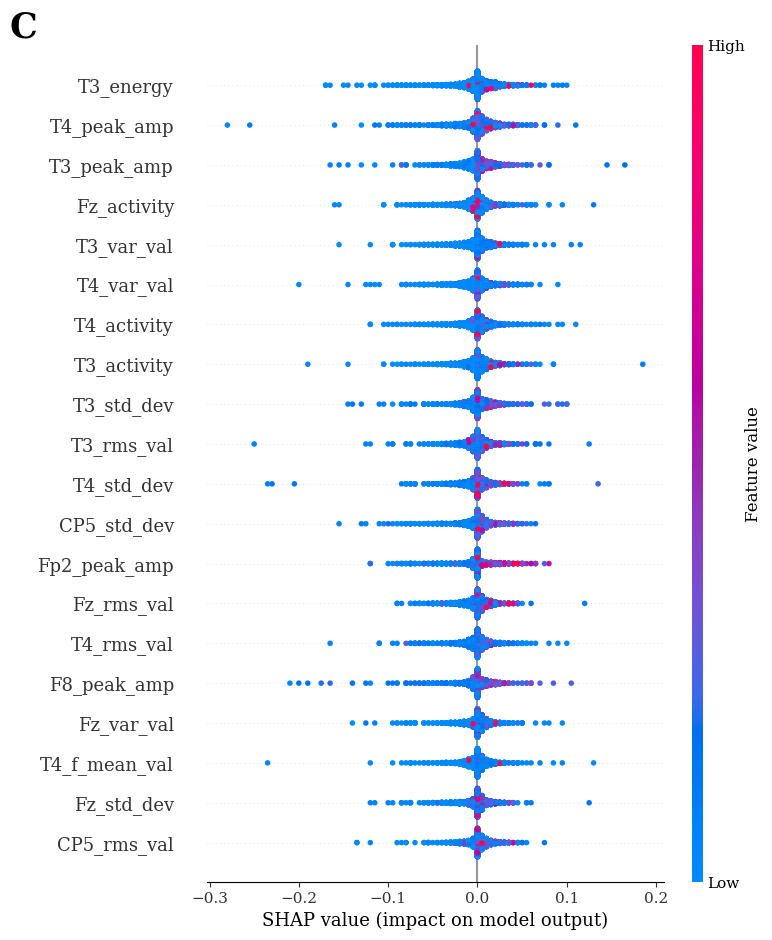

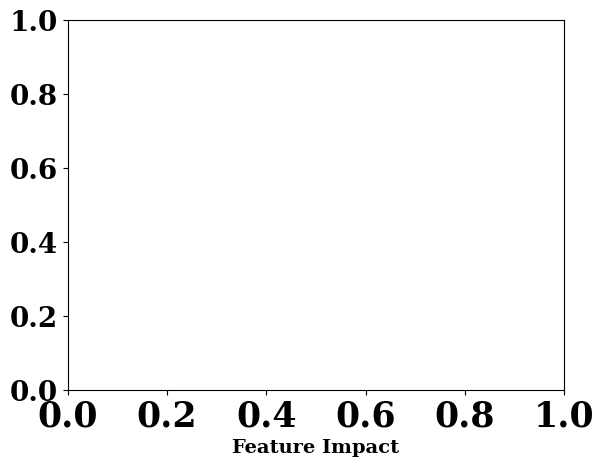

In [ ]:
plt.rcParams.update({'font.family':'serif'})
# plt.figure(figsize=(10,5))
plt.title('C', weight='bold', fontsize=25, y = 1, x=-.4)
shap.summary_plot(dt_shap_values, show = True,auto_size_plot=(5,5))


plt.xticks(weight='bold', fontsize=25)
plt.yticks(weight='bold', fontsize=20)



# add X-axis title
plt.xlabel('Feature Impact', fontsize=14, fontweight='bold')


for fc in plt.gcf().get_children():

    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(newCmap)





# plt.savefig('/content/drive/MyDrive/Colab Notebooks/BDHS/Final results and images/final results/balance data/diabetes/Diabetes DB3.svg')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/BDHS/Final results and images/final results/balance data/diabetes/Diabetes DB3.pdf', dpi=800)
plt.show()